In [348]:
import pandas as pd
import re
#OK so it's simple and not magic but it works
hashtag_regex = re.compile(r'\#(\w*)')

# Sources

NBC News is publishing its database of more than 200,000 tweets that Twitter has tied to "malicious activity" from Russia-linked accounts during the 2016 U.S. presidential election.


https://developers.slashdot.org/story/18/02/17/0038251/nbc-publishes-200000-tweets-tied-to-russian-trolls



The original file has some junk in it which we have to delete before opening with Pandas :

Tweets from confirmed Russian trolls, shows only username, timestamp (in UTC), tweet text, and number of times tweet was retweeted and favorited according to our data",,,,,,,,,,,,,,,,,

From NBC News' story: https://www.nbcnews.com/tech/social-media/now-available-more-200-000-deleted-russian-troll-tweets-n844731,,,,,,,,,,,,,,,,,

"If you publish using the data, please credit NBC News and include a link to this page. Send questions to ben.popken@nbcuni.com or twitter.com/bpopken.",,,,,,,,,,,,,,,,,

Twitter screenname,Date tweet sent,Tweet text,Times retweeted,Times favorited,,,,,,,,,,,,,

ryanmaxwell_1,3/22/2016 18:31,#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?,,,,,,,,,,,,,,,



# Minimal cleanup of the CSV


In [ ]:
fp = file('streamlined_tweets.csv','r')
print ''.join(fp.readlines()[:5])

In [86]:
fp = file('streamlined_tweets.csv','r')
fe = file('fakenews_tweets.csv','w')

with fe as piggy:
    for L in fp.readlines()[3:]:
        piggy.write(L)

df = pd.read_csv('fakenews_tweets.csv')

so the data now looks OK 
there are still a few NaNs in the **Tweet text**
column but this isn't so important.

I decided to rename the columns as it made following examples easier

1. everything to lower case
1. swap out spaces to underscores

In [429]:
' '.join( list( df.columns.values)[:])

'twitter_screenname date_tweet_sent tweet_text times_retweeted times_favorited Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17 doy'

In [268]:
rename_mapper = {}
for x in df.columns.values[:5]:
    rename_mapper[x] = x.lower().replace(' ','_')
rename_mapper

{'Date tweet sent': 'date_tweet_sent',
 'Times favorited': 'times_favorited',
 'Times retweeted': 'times_retweeted',
 'Tweet text': 'tweet_text',
 'Twitter screenname': 'twitter_screenname'}

In [287]:
#Do an inplace as this is a fair chunk of data
df.rename(index=str, 
          columns=rename_mapper,
          copy=False,
          inplace=True)
df.columns.values[:5]

array(['twitter_screenname', 'date_tweet_sent', 'tweet_text',
       'times_retweeted', 'times_favorited'], dtype=object)

so now we can just run a regex on the column 

In [306]:
ph_raw = re.compile(r'\#pokemon\w*', re.IGNORECASE)
# for some reason the fancy indexer won't work with NaN 
# so we have to set a flag to False
mask = df.tweet_text.str.contains(ph_raw, na=False)

In [310]:
df[mask][:5]

,twitter_screenname,date_tweet_sent,tweet_text,times_retweeted,times_favorited,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
2805,peterkistner,7/20/2016 12:26,RT @SPIEGELONLINE: In Dänemark hat eine 49-Jäh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36987,puredavie,7/30/2016 15:13,#IHatePokemonGoBecause my husband wants to cal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49204,marianeuberg1,7/20/2016 12:18,RT @SPIEGELONLINE: In Dänemark hat eine 49-Jäh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49362,puredavie,7/30/2016 16:33,RT @DanaGeezus: #IHatePokemonGoBecause now I ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50021,mr_clampin,8/16/2016 9:39,RT @SuperGeekGirls: One of our stunning @super...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pokemon Go fans

So let's take someone who has tweeted about Pokemon at random.

In [352]:

subject = df[ df.twitter_screenname == 'traceyhappymom']
stuff = subject.tweet_text.values
stuff = stuff.reshape((-1,))

In [345]:
set(hashtag_regex.findall(' '.join(stuff)))
print

In [371]:
def indexer2tweet_txt(indexer):
    return '\n'.join(indexer.tweet_text.values.reshape((-1,)) )

In [482]:
trump_regex = re.compile('trump',re.IGNORECASE)
putin_regex = re.compile('putin',re.IGNORECASE)
hilary_regex = re.compile('hillary',re.IGNORECASE)
sanders_regex = re.compile('sanders',re.IGNORECASE)
cp = putin_regex
mask = subject.tweet_text.str.contains(cp,na=False)
print indexer2tweet_txt(subject[mask])

RT @JohnFPLane: Just spoke to Putin. Fantastic, great guy. Knows a great deal when he sees it. Sold him the White House! #probabletrumpstwe…
RT @DoompaAlioompa: #ProbableTrumpsTweets
I'll be Putin on the Ritz if you don't text back
RT @Born_To_DYE: #TrumpsFavoriteHeadline Putin admits: 'Trump is my hero.'
RT @WhiteCollarCMDY: #ProbableTrumpsTweets
Invites go out to Putin, Jong-un, Khomeini, Duterte and Mugabe--poker at my house, winner gets t…


In [430]:
mask = df.tweet_text.str.contains('#ProbableTrumpsTweets', na=False)
#print indexer2tweet_txt(df[mask])

# Rough Analysis

This is just screwing around to see what is in the file.

### Todo

I should really feed this through an **NLP** pipeline.

In [311]:
AA = df.twitter_screenname.values
BB = df.tweet_text.values

In [58]:
names = set( AA.reshape((-1,)))

In [63]:
txts =  list(BB.reshape((-1,)))

In [72]:
txts = [x.replace('\n',' ') + '\n' for x in txts if type(x) == str]

so here there are a load of texts about Pokemon.

- What does this prove? 
- Why didn't they clean the data?
- Do those pesky Russians spies want to prove they are real people?

In [92]:
pokemon = [x for x in txts if 'pokemon' in x.lower()]
len(pokemon)

181

# Add day of the year column 

we want to plot frequencies of tweets

In [379]:
df.date_tweet_sent[-10:].values

array(['7/15/2016 17:36', '5/28/2016 13:43', '10/16/2016 13:08',
       '4/7/2016 12:08', '11/24/2016 13:52', '11/1/2016 12:13',
       '6/18/2015 1:04', '1/10/2017 18:50', '11/20/2016 21:49',
       '12/19/2016 23:00'], dtype=object)

In [397]:

def date_to_nth_day(date, format='%m/%d/%Y'):
    date = pd.to_datetime(date, format=format)
    new_year_day = pd.Timestamp(year=date.year, month=1, day=1)
    return (date - new_year_day).days + 1

def doy(x):
    if isinstance(x,str):
        return date_to_nth_day(x.split()[0])
    else:
        #return a default fake value out of the normal range
        return -1
    
dates = [doy(x) for x in  df.date_tweet_sent[:].values]

add these as they will be useful for plotting later

In [440]:
df.loc[:,'doy'] = pd.Series(dates, index=df.index)

0     82
1    284
2     53
Name: doy, dtype: int64

# Analysis of frequencies

This is just simple "traffic" analysis..



In [468]:
import matplotlib.pyplot as plt
%matplotlib inline

import collections
date_data  = collections.Counter(dates)

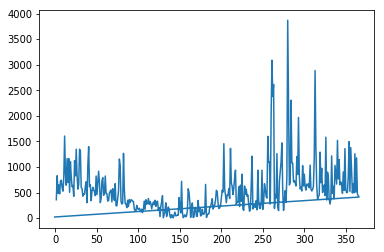

In [470]:
XS,YS = zip(*date_data.items())
plt.plot(XS,YS)

In [489]:
mask = df.tweet_text.str.contains(trump_regex, na=False) 
#careful returns a dictionnary
date_data  = collections.Counter(df[mask].doy).items()

In [491]:
date_data.sort(key = lambda x:x[1])

So let's look at the **top 10** days for traffic.

There is aperiod of 4 days of intense activity 260-263.

The election was held on November 8, 2016 = 313

There were debates on the following days :

- P1	September 26, 2016	9 p.m. 
- VP	October 4, 2016	9 p.m. 
- P2	October 9, 2016	8 p.m. CDT	
- P3	October 19, 2016	6 p.m. PDT	
- P4	October 25, 2016	7 p.m. MDT	


SOURCE : https://en.wikipedia.org/wiki/United_States_presidential_election,_2016#Primary_election_debates


In [512]:
for x,y in date_data[-10:]:
    print y, str(pd.to_datetime(2016 * 1000 + x, format='%Y%j')).split()[0], x


 519 2016-09-23 267
545 2016-09-29 273
713 2016-11-09 314
826 2016-10-07 281
944 2016-09-19 263
956 2016-09-16 260
987 2016-09-18 262
1291 2016-10-06 280
1435 2016-09-17 261
1472 2016-11-08 313


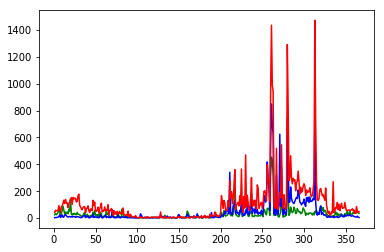

In [486]:
styles = ['r','b','g']
obama_regex = re.compile('obama',re.IGNORECASE)
for cp in [obama_regex, hilary_regex, trump_regex]:
    mask = df.tweet_text.str.contains(cp, na=False)
    date_data  = collections.Counter(df[mask].doy)
    XS,YS = zip(*date_data.items())
    plt.plot(XS,YS, styles.pop())

## Extracting Tweets for a day

And here is how to extract what was said about Trump or whoever on a 
particular day of the year = doy

In [595]:
print '\n'.join( df[( df.doy == 280) & (df.tweet_text.str.contains(hilary_regex)) ].tweet_text.values)[:2000]

RT @Darren32895836: After Hillary Clinton Caught 4attempting 2take advantage of Americans hardships &amp;tears changes Strat #PrayForFlorida ht…
RT @gerfingerpoken: Did IRS Leak Trump Returns 2 Help Hillary? https://t.co/EWkqWLPAQN American Thinker https://t.co/L7h6rlr1le  https://t.…
RT @sweetatertot2: DNC leaked emails show Hillary Camp's plans to meet with Megyn Kelly Team to discuss "future hits" on Trump? Sick! https…
RT @MathewSHarrison: .@HillaryClinton's top aide &amp; #MuslimBrotherhood operative Huma Abedin hates Jews- didn't see that coming..
https://t.…
Foke Prankster reporter horrifies New Yorkers by announcing Hillary Clinton has ZIKA https://t.co/vlLroBVwCQ #Foke
I can't stop 😂😂

Just watch this "high energy" Hillary's rally! 

Explain me how can the polls be favorable to her?… https://t.co/bUpNaTKGgQ
RT @Houseman75: I'm a Coal Miner from Indiana. I don't need New Doubts about Hillary. I already have plenty. #TrumpPence16
RT @phillyrich1: TIM KAINE SHOCK VIDEO 6: SEE TIM

## Who tweeted the most over the period 260-264

In [519]:
mask =  (df.doy > 259) & (df.doy <264)
chunk = df[mask]

In [526]:
tweet_freqs = collections.Counter(chunk.twitter_screenname.values).items()
tweet_freqs.sort( key=lambda x:-x[1])

In [531]:
tweet_freqs[:20]

[('ameliebaldwin', 2176),
 ('hyddrox', 1464),
 ('rh0lbr00k', 1133),
 ('kateritterrrr', 734),
 ('finley1589', 512),
 ('dorothiebell', 500),
 ('cassishere', 298),
 ('jacquelinisbest', 267),
 ('wadeharriot', 249),
 ('karenparker93', 246),
 ('hollydler', 199),
 ('cynthiamhunter', 199),
 ('prettylaraplace', 189),
 ('_nickluna_', 182),
 ('ten_gop', 139),
 ('patriotblake', 111),
 ('garrettsimpson_', 85),
 ('cookncooks', 73),
 ('pamela_moore13', 60),
 ('usa_gunslinger', 55)]

Does it look like a Zipf ?

https://en.wikipedia.org/wiki/Zipf%27s_law

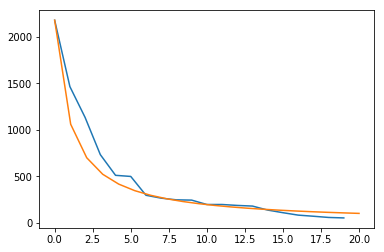

In [546]:
import numpy as np
names,YS = zip(*tweet_freqs[:20])
plt.plot(YS)
#comparison 
TS = np.linspace(0,20,20)
plt.plot(TS,2176/(TS + 1) )

In [580]:
number1 = df[df.twitter_screenname == 'ameliebaldwin']
number2 = df[df.twitter_screenname == 'hyddrox']

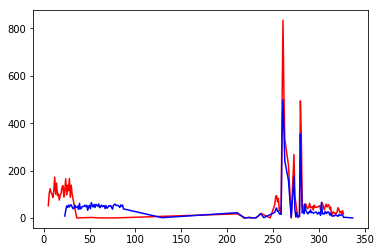

In [581]:
XS,YS = zip(*collections.Counter(number1.doy.values).items())
plt.plot(XS,YS,'r')

XS,YS = zip(*collections.Counter(number2.doy.values).items())
plt.plot(XS,YS,'b')

In [594]:
print '\n'.join( number2[number2.doy < 100 ].tweet_text.values)[:2000]

RT @K1erry: The Marco Rubio knockdown of Elizabeth Warren no liberal media outlet will cover https://t.co/Rh391fEXe3
RT @TrumpSuperPAC: Obama's a Muslim &amp; this video from @FoxNews proves it! Even @CNN admits Obama's training protesters/jihadists! #MAGA htt…
RT @schotziejlk: .@greta Who is your #SuperBowl favorite?
RT @jefe_viejo: Dem Civil War: Pelosi Fires Back at Warren | LifeZette https://t.co/5GsJVPRnXH
RT @wretchardthecat: People believe from instinct.  The Roman gods became ridiculous when the Roman emperors did.  PC is the equivalent of…
RT @jimmylemons: entire media doing the hyping https://t.co/eOiFChIs7Z
RT @tlamb775: https://t.co/HLAdjCm5vO
RT @BillZucker: DONT YOU JUST HATE IT when you go out and buy something and that night you find a COUPON in your Local Paper! PLS RT https:…
RT @luchadora41: A Week of Terror and Diversity in Europe https://t.co/5PGVEVD9w4 #WakeUpAmerica
RT @Laurie89764267: @Craftmastah @bigbare44, I was at the rally on Melbourne, Fl and it was a beau

In [560]:
fp = file('number1.txt','w')
with fp as dump:
    dump.write('\n'.join( number1[ (number1.doy > 259) & (number1.doy < 265) ].tweet_text.values) )

## Retweets


So most if not all of these are retweets 

so what ?

In [584]:
rt_regex = re.compile('RT @([\w|_]+)')
tweet_bags = [ kk[ (kk.doy > 259) & (kk.doy < 265) ].tweet_text for kk in [number1,number2] ] 
orig_tweeters = [ x.str.extract(rt_regex) for x in tweet_bags]

/Users/macbuse/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [585]:
A = set(orig_tweeters[0])
B = set(orig_tweeters[1])

In [588]:
C = A.intersection(B)

In [593]:
C

{'2ALAW',
 'AG_Conservative',
 'AIIAmericanGirI',
 'AP',
 'APatriotDude',
 'AceofSpadesHQ',
 'Al_Gorelioni',
 'AllenWest',
 'Always_Trump',
 'AmyMek',
 'AnnCoulter',
 'AnneBayefsky',
 'AnthonyVVeiner',
 'BeckyWuThere',
 'BretBaier',
 'CNN',
 'CarmineZozzora',
 'Cernovich',
 'ChrisCoon4',
 'ChristiChat',
 'ChristieC733',
 'ChuckNellis',
 'Conservative_VW',
 'ConstanceQueen8',
 'CounterJihadUS',
 'DBloom451',
 'DRUDGE_REPORT',
 'DailyCaller',
 'DanRiehl',
 'DanScavino',
 'Darren32895836',
 'Davewellwisher',
 'Dbargen',
 'Debramax',
 'DineshDSouza',
 'DonaldT4Prez',
 'DrMartyFox',
 'Eyes_of_justice',
 'FemalesForTrump',
 'FiveRights',
 'FoxNews',
 'Gumball55668882',
 'Harlan',
 'Hillarizer',
 'Hutch_USA',
 'INTJutsu',
 'I_AmAmerica',
 'Ian56789',
 'Italians4Trump',
 'JOMainEvent',
 'JackPosobiec',
 'JasonMillerinDC',
 'JesseKellyDC',
 'JohnFromCranber',
 'JohnKStahlUSA',
 'Johnatsrs1949',
 'K1erry',
 'KatiePavlich',
 'KellyannePolls',
 'KevinJacksonTBS',
 'KlayVolk',
 'LadyLiberTea',
 'La

# Hashtag analysis

I'm not going to do anything complicated but here we go

In [111]:
data = file('amalgam_txts.txt','r').read()

In [322]:
tags = hashtag_regex.findall(data)
tags = list(set(tags))
tags.sort()

In [247]:
clinton = [x for x in tags if 'clinton' in x.lower()]
clinton = list(set(clinton))
clinton.sort()

In [249]:
#associated_words(clinton,['clintons','hilary'])

In [158]:
bill = [x for x in clinton if 'bill' in x.lower()]
hil = [x for x in clinton if 'hillary' in x.lower() ]

we have to write a filter to clean things up 
using a list of **stop words**

In [234]:
def associated_words(tags, omit=['']):
    stop_words = omit + ['bill','hillary','clinton','2016','16','_'] 
    old = ' '.join(tags)
    stuff = old.lower()
    for x in stop_words:
        stuff = stuff.replace(x,'')
    return set(stuff.split())

In [233]:
associated_words(hil)

{'arrest',
 'corrupt',
 'criminal',
 'crooked',
 'forpresident',
 'indict',
 'rotten',
 'scripted',
 'searchterms',
 'theliesof'}

In [228]:
obama = [x for x in tags if 'obama' in x.lower()]

In [494]:
associated_words(obama, omit=['obama','barack'])
print

In [241]:
america = [x for x in tags if 'america' in x.lower()]
associated_words(america, omit=['american','america'])

{'1st',
 '4',
 '4alls',
 'actfor',
 'african',
 'africanhomelandstates',
 'africans',
 'allrejects',
 'anti',
 'antirhetoric',
 'antitrumpis',
 'bendover',
 'black',
 'blackpbs',
 'blacks',
 'bornagain',
 'callbank',
 'cgi',
 'contractwith',
 'dad',
 'death2',
 'deathto',
 'decides',
 'democratsdestructionof',
 'deservesbetter',
 'disgraceto',
 'divided',
 'eagle',
 'eagleday',
 'energyplan',
 'f',
 'failedslogans',
 'fake',
 'falls',
 'feminine4trump',
 'fi',
 'fir',
 'firs',
 'first',
 'flag',
 'for',
 'fuckingsinrealtime',
 'fundamentallychanged',
 'getitright',
 'godbless',
 'gods',
 'gophatess',
 'gopunfit2leadorgoverns',
 'greats',
 'grindingdown',
 'guns',
 'gunsin',
 'hates',
 'hatess',
 'heartassociation',
 'hire',
 'historyisblack',
 'honest',
 'horrorstory',
 'hostage',
 'howtosurvivetrumps',
 'idol',
 'ilove',
 'include',
 'inspiring',
 'isback',
 'isdoomed',
 'ismnotglobalism',
 'keepbeautiful',
 'keepsafeagain',
 'lagalaxyvs',
 'lefthates',
 'letsmakegreat',
 'letsmakegre